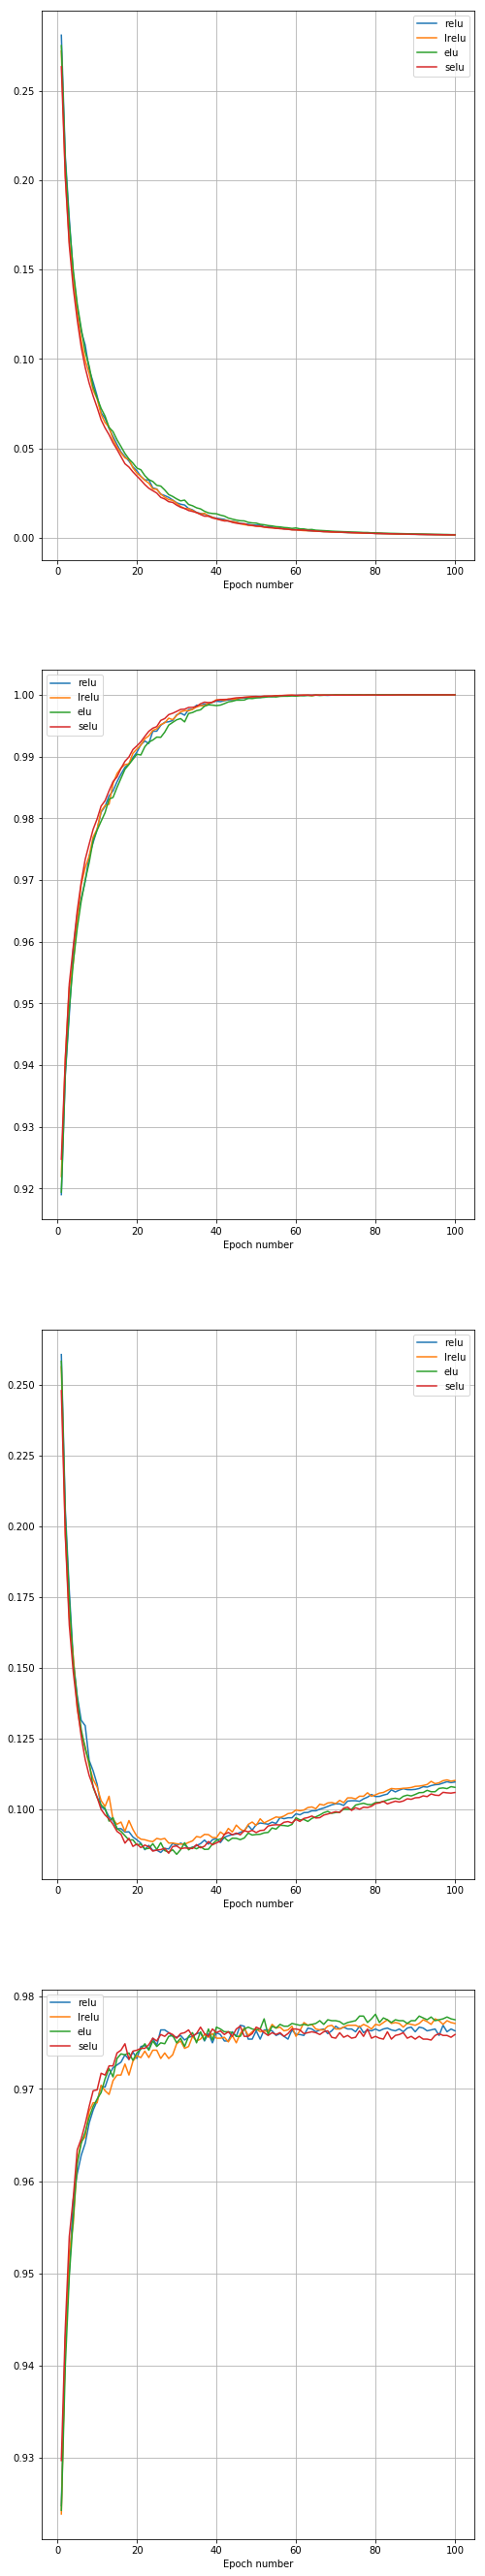

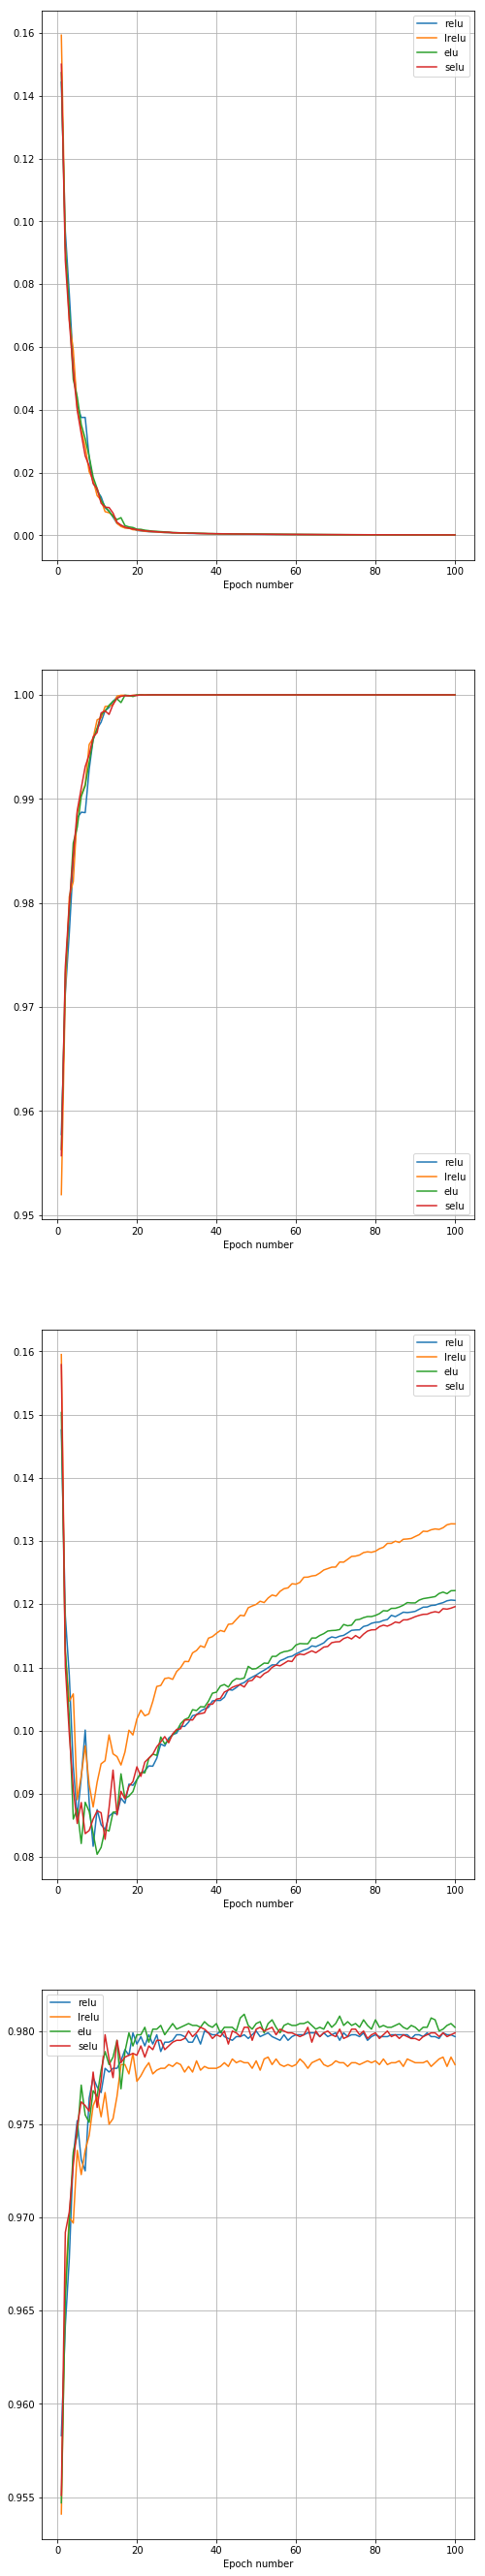

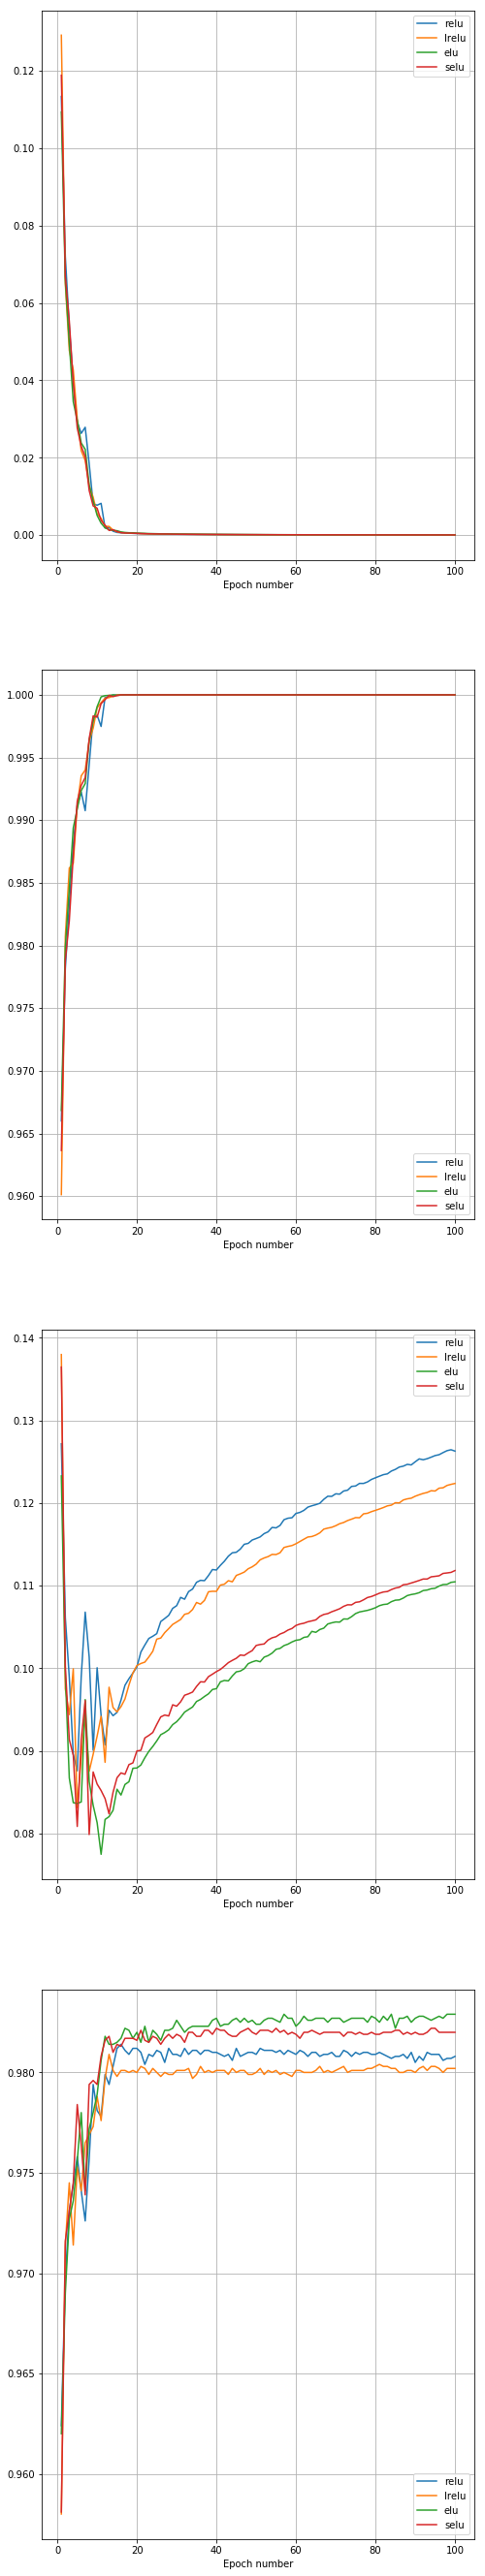

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
%matplotlib inline

def plot_results_for_comparisons():
    exp_names = ["exp1", "exp2", "exp3"]
    activations = ["relu", "lrelu", "elu", "selu"]
    
    # train err | train acc | val err | val acc | params
    metrics_name = ["train ERR", "train ACC ", "val ERR", "val ACC", "params"]

    for exp_name in exp_names:
        metrics_list = [OrderedDict(), OrderedDict(), OrderedDict(), OrderedDict(), OrderedDict()]
        
        for activation in activations:
            file_name = "{:s}_{:s}.txt".format(exp_name, activation)
            net_metrics = np.loadtxt(file_name, delimiter=',', skiprows=2)
            
            assert len(metrics_list) == net_metrics.shape[1]
            
            for idx, ml in enumerate(metrics_list):
                ml[activation] = net_metrics[:, idx]            

        f, ax = plt.subplots(len(metrics_list) - 1, 1, figsize=(8, 48))

        for ml, a, name in zip(metrics_list, ax, metrics_name):
            if name is "params":
                break
            for net in ml:
                a.plot(np.arange(1, len(ml[net])), ml[net][1:], label=net)
            a.legend(loc=0)
            #a.set_title(name + " | " + hyper)
            a.set_xlabel("Epoch number")
            a.grid()

plot_results_for_comparisons()    